# Challenge 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [24]:
df.value.quantile(0.025)
df.value.quantile(0.975)

177613.075

In [ ]:
df.value.plot()

## Clean Data

In [25]:
q_025 = df.value.quantile(0.025)
q_0975 = df.value.quantile(0.975)

def calc_tails(input):
        if (input > q_025) & (input < q_0975): 
            return 1
        else:
              return 0

df['test'] = df.apply(lambda x: calc_tails(x.value), axis=1)
df = (df.query('test in [1]')
   .loc[:,['value']]
)

## Line Plot

In [ ]:
def draw_line_plot():
    dates = pd.to_datetime(df.index)
    views = df.value

    fig, ax = plt.subplots(figsize=(14,6))
    ax.plot(dates, views, color='darkred')

    ax.set(xlabel='Date', ylabel='Page Views',
        title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    return fig

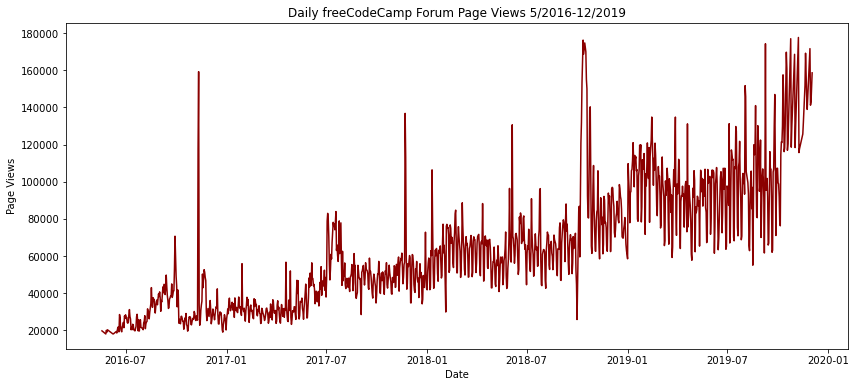

In [41]:
# Data for plotting
dates = pd.to_datetime(df.index)
views = df.value

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(dates, views, color='darkred')

ax.set(xlabel='Date', ylabel='Page Views',
       title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

plt.show()

## Bar Plot

In [101]:
# Data for plotting
dates = pd.to_datetime(df.index)


df_avg = (df.assign(year = pd.to_datetime(df.index).year,
           month = pd.to_datetime(df.index).month)
   .groupby(["year", "month"])
   .mean()
)

# df_avg = df_avg.reset_index()

In [102]:
df_avg.head()

value
year month              
2016 5      19432.400000
     6      21875.105263
     7      24109.678571
     8      31049.193548
     9      41476.866667

In [95]:
df_pivot = pd.pivot_table(df_avg, values='value', index=['year'],
                       columns=['month'])

df_pivot = df_pivot.reset_index()

<AxesSubplot:xlabel='Years', ylabel=' Average Page Views'>

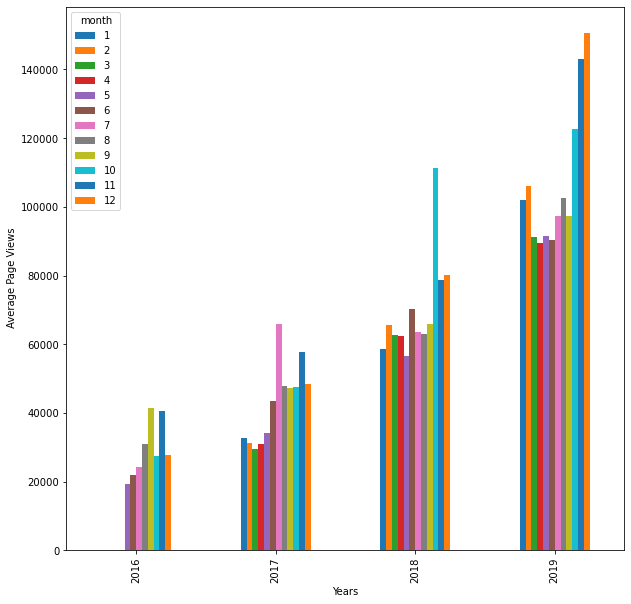

In [125]:
# plot grouped bar chart 
df_pivot.plot(x='year', 
        kind='bar', 
        stacked=False,
        figsize= (10,10),
        xlabel = 'Years',
        ylabel = ' Average Page Views') 


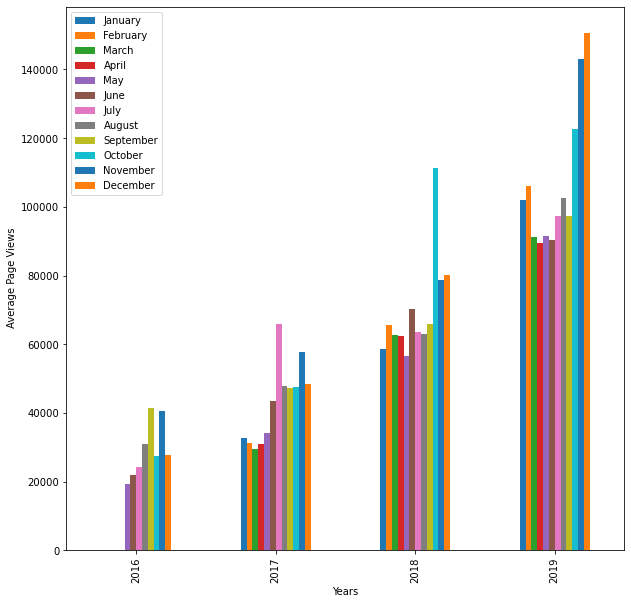

In [133]:
# fig, ax = plt.subplots()
fig = df_pivot.plot(x='year', 
        kind='bar', 
        stacked=False,
        figsize= (10,10),
        xlabel = 'Years',
        ylabel = ' Average Page Views') 

plt.legend([
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
])



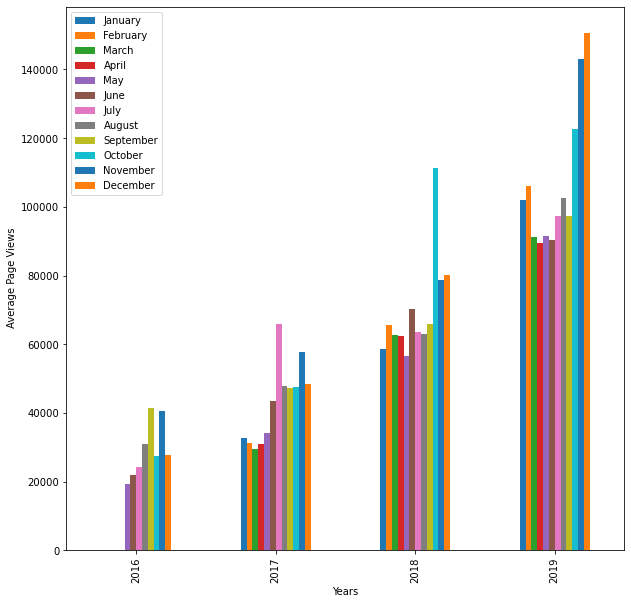

In [136]:
fig.figure

In [ ]:
fig.savefig('bar_plot.png')

# Seaborn Boxplot

In [164]:
df_box = (df.assign(year = pd.to_datetime(df.index).year,
           month = pd.to_datetime(df.index).month)
)

df_box = df_box.reset_index()

In [165]:
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,5
1,2016-05-26,18060,2016,5
2,2016-05-27,19997,2016,5
3,2016-05-28,19044,2016,5
4,2016-05-29,20325,2016,5


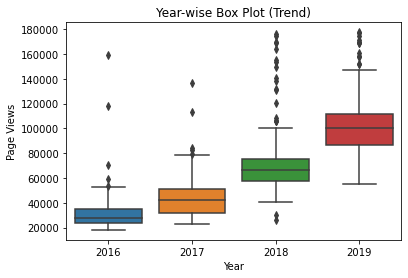

In [180]:
box_trend_plot = sns.boxplot(data = df_box, x = 'year', y = 'value').set_title('Year-wise Box Plot (Trend)')

# Get the current axis
ax = plt.gca()

# Set the xlabel (x-axis label)
ax.set_xlabel("Year")
ax.set_ylabel("Page Views")

# Show the plot
plt.show()

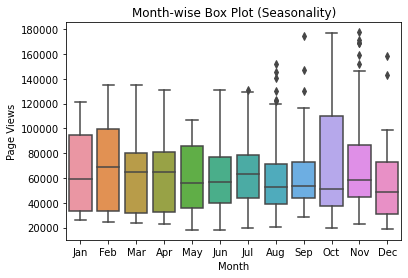

In [183]:
box_trend_season = sns.boxplot(data = df_box, x = 'month', y = 'value').set_title('Month-wise Box Plot (Seasonality)')

# Get the current axis
ax = plt.gca()

# Set the xlabel (x-axis label)
ax.set_xlabel("Month")
ax.set_ylabel("Page Views")

# X-ticks
# Define custom x-axis tick labels
custom_xtick_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Set the custom xtick labels
ax.set_xticklabels(custom_xtick_labels)

# Show the plot
plt.show()

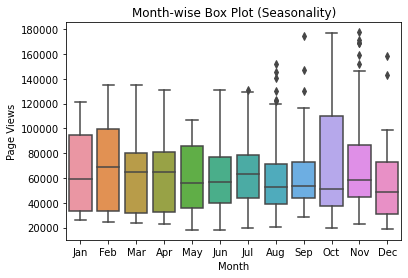

In [184]:
box_trend_season.figure

# Both plots together

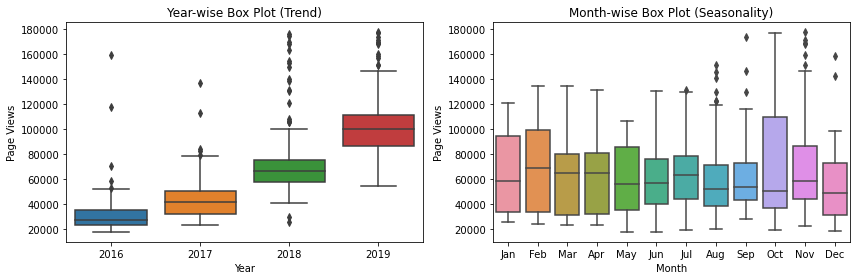

In [196]:
# Create some example data
data1 = sns.load_dataset("iris")
data2 = sns.load_dataset("tips")

# Create the first Seaborn plot
plt.figure(figsize=(12, 4))  # Set the figure size
plt.subplot(1, 2, 1)  # Create a subplot on the left (1 row, 2 columns, first position)
sns.boxplot(data = df_box, x = 'year', y = 'value').set_title('Year-wise Box Plot (Trend)')

# Get the current axis
ax = plt.gca()

# Set the xlabel (x-axis label)
ax.set_xlabel("Year")
ax.set_ylabel("Page Views")


# Create the second Seaborn plot
plt.subplot(1, 2, 2)  # Create a subplot on the right (1 row, 2 columns, second position)
sns.boxplot(data = df_box, x = 'month', y = 'value').set_title('Month-wise Box Plot (Seasonality)')

# Get the current axis
ax = plt.gca()

# Set the xlabel (x-axis label)
ax.set_xlabel("Month")
ax.set_ylabel("Page Views")

# X-ticks
# Define custom x-axis tick labels
custom_xtick_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Set the custom xtick labels
ax.set_xticklabels(custom_xtick_labels)

# Adjust the layout
plt.tight_layout()

# Show the plots
# plt.show()